In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/gaganpuri/Documents/Broadway/NLP/data.csv", encoding='iso-8859-1', names=["text", "label"])

In [3]:
df.head()

,text,label
0,Sentence,Sentiment
1,The GeoSolutions technology will leverage Bene...,positive
2,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
3,"For the last quarter of 2010 , Componenta 's n...",positive
4,According to the Finnish-Russian Chamber of Co...,neutral


In [4]:
df.drop(0, inplace=True)

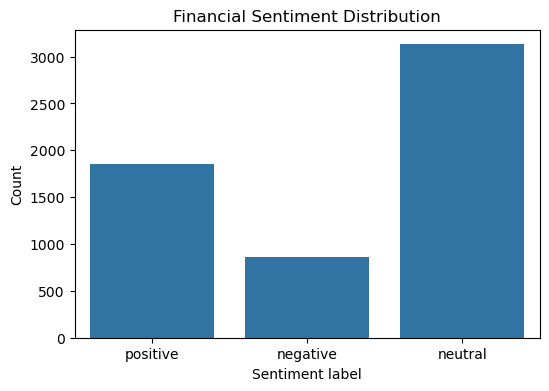

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label',)
plt.title("Financial Sentiment Distribution")
plt.xlabel("Sentiment label")
plt.ylabel("Count")
plt.show()

In [6]:
# neutral_df = df[df['label'] == 'neutral']
# non_neutral_df = df[df['label'] != 'neutral']

# neutral_df_reduced = neutral_df.sample(frac=0.3, random_state=42)

# new_df = pd.concat([non_neutral_df, neutral_df_reduced]).reset_index(drop=True)

# new_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [7]:
new_df = df[df['label'] != 'neutral'].reset_index(drop=True)

In [8]:
positive_df = new_df[new_df['label'] == 'positive']
negative_df = new_df[new_df['label'] != 'positive']

positive_df_reduced = positive_df.sample(frac=0.6, random_state=42)

new_df = pd.concat([negative_df, positive_df_reduced]).reset_index(drop=True)

new_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)

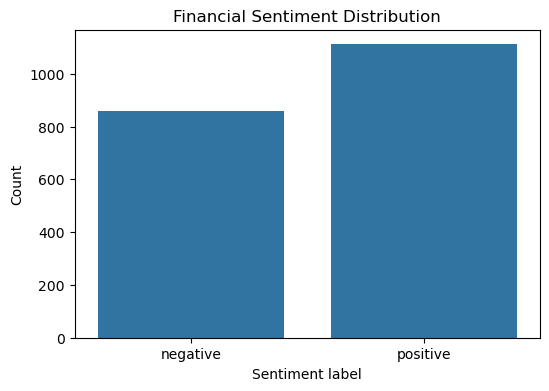

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=new_df, x='label',)
plt.title("Financial Sentiment Distribution")
plt.xlabel("Sentiment label")
plt.ylabel("Count")
plt.show()

In [10]:
df = new_df

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


In [12]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [13]:
# Initialize tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [14]:
# Custom text preprocessing function
def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(cleaned)

In [15]:
df['clean_text'] = df['text'].apply(preprocess)


In [16]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)


In [17]:
senti_model = MultinomialNB()
senti_model.fit(X_train, y_train)


MultinomialNB()

In [18]:
y_pred = senti_model.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.74      0.66      0.70       163
    positive       0.78      0.84      0.81       232

    accuracy                           0.76       395
   macro avg       0.76      0.75      0.75       395
weighted avg       0.76      0.76      0.76       395



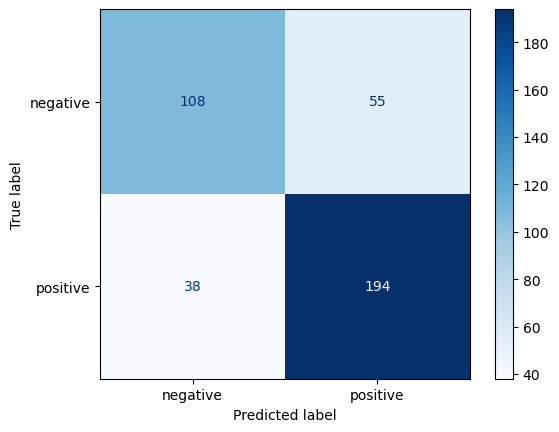

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['label'].unique())
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [31]:
# sample_text = "The market is in profit these days."

sample_text = "I've lost huge amount of money from NEPSE"

# Preprocess using the same steps
sample_text_cleaned = preprocess(sample_text)

# Vectorize
sample_vector = vectorizer.transform([sample_text_cleaned])

# Predict
predicted_category = senti_model.predict(sample_vector)
print("Predicted Category:", predicted_category[0])

Predicted Category: negative


In [24]:
import pickle


with open("sentiment_model.pkl", 'wb') as file:
    pickle.dump(senti_model, file)

with open("sentiment_vectorizer.pkl", 'wb') as file:
    pickle.dump(vectorizer, file)